>#### Sentiment analysis of amazon reviews

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Shree/Downloads/T_A_R_data.csv')

In [3]:
df.head()

,Count,title,rating,body
0,1,Amazing,5,I truly recommend it to all. It's a fantastic ...
1,2,Good,4,One of the best in fiction books.It will take ...
2,3,You will love it.,5,Nothing more to say. Mind blowing book. Dont h...
3,4,No bookmark!,5,I ordered 8 books altogether but not even a si...
4,5,Great read!,5,A must read for all. D amazon delivery was quick.


In [4]:
df.shape

(1220, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Count   1220 non-null   int64 
 1   title   1220 non-null   object
 2   rating  1220 non-null   int64 
 3   body    1202 non-null   object
dtypes: int64(2), object(2)
memory usage: 38.2+ KB


In [6]:
df.title.head()

0              Amazing
1                 Good
2    You will love it.
3         No bookmark!
4          Great read!
Name: title, dtype: object

In [7]:
df.body.head()

0    I truly recommend it to all. It's a fantastic ...
1    One of the best in fiction books.It will take ...
2    Nothing more to say. Mind blowing book. Dont h...
3    I ordered 8 books altogether but not even a si...
4    A must read for all. D amazon delivery was quick.
Name: body, dtype: object

### Text Preprocessing

In [8]:
% pip install textblob

UsageError: Line magic function `%` not found.


In [9]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))


In [10]:
df['body'] = df['body'].str.replace('[^\w\s]', "")
df.body.head(5)

C:\Users\Shree\AppData\Local\Temp/ipykernel_8452/4200118748.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace('[^\w\s]', "")


0    i truly recommend it to all its a fantastic bo...
1    one of the best in fiction booksit will take t...
2    nothing more to say mind blowing book dont hes...
3    i ordered 8 books altogether but not even a si...
4      a must read for all d amazon delivery was quick
Name: body, dtype: object

### Removal of Stop Words 

In [11]:
 
stop = stopwords.words('english')
df['body'] = df['body'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.body.head()

0         truly recommend fantastic book get easy come
1    one best fiction booksit take world worth reading
2    nothing say mind blowing book dont hesitate bu...
3    ordered 8 books altogether even single bookmar...
4                      must read amazon delivery quick
Name: body, dtype: object

### Spelling Correction

### Lemmatization

In [12]:

df['body'] = df['body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.body.head()

0         truly recommend fantastic book get easy come
1    one best fiction booksit take world worth reading
2    nothing say mind blowing book dont hesitate bu...
3    ordered 8 book altogether even single bookmark...
4                      must read amazon delivery quick
Name: body, dtype: object

### Look at the Summary Text using wordcloud

In [13]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [15]:
df.columns

Index(['Count', 'title', 'rating', 'body'], dtype='object')

In [16]:
df.rating.value_counts()

5    911
4    182
3     58
1     42
2     27
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

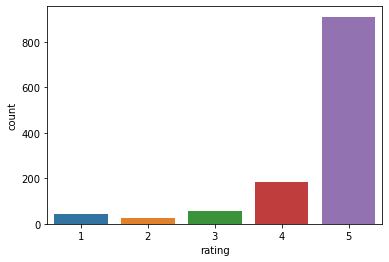

In [17]:
sns.countplot(data = df, x = 'rating')

In [18]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [19]:
score_1 = reviews[reviews['rating'] == 1]
score_2 = reviews[reviews['rating'] == 2]
score_3 = reviews[reviews['rating'] == 3]
score_4 = reviews[reviews['rating'] == 4]
score_5 = reviews[reviews['rating'] == 5]

In [20]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

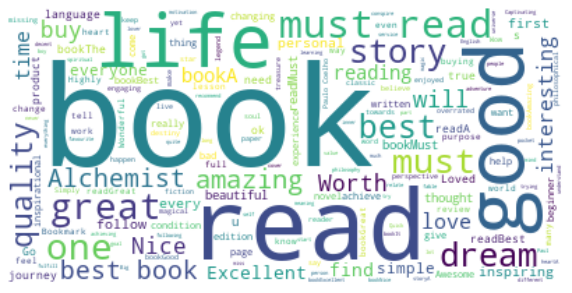

In [21]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.title.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['rating'].isin([1,2]) ]
neutral_reviews = reviews_sample[reviews_sample['rating'].isin([3])]
positive_reviews = reviews_sample[reviews_sample['rating'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.title.str.cat()
neutral_reviews_str = neutral_reviews.title.str.cat()
positive_reviews_str = positive_reviews.title.str.cat()


### Create WordCloud

In [23]:
wordcloud_negative = WordCloud(max_words=200,colormap='turbo',stopwords=STOPWORDS).generate(negative_reviews_str)
wordcloud_neutral = WordCloud(max_words=200,colormap='coolwarm',stopwords=STOPWORDS).generate(neutral_reviews_str)
wordcloud_positive = WordCloud(max_words=200,colormap='Set1',stopwords=STOPWORDS).generate(positive_reviews_str)


Text(0.5, 1.0, 'Reviews with Negative Scores')

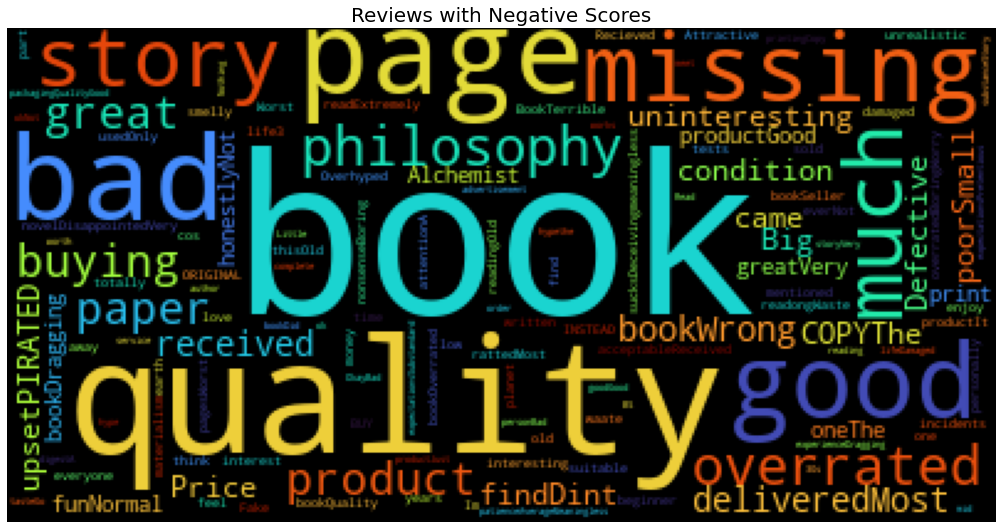

In [24]:
# Plot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation=None)
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

Text(0.5, 1.0, 'Reviews with Neutral Scores')

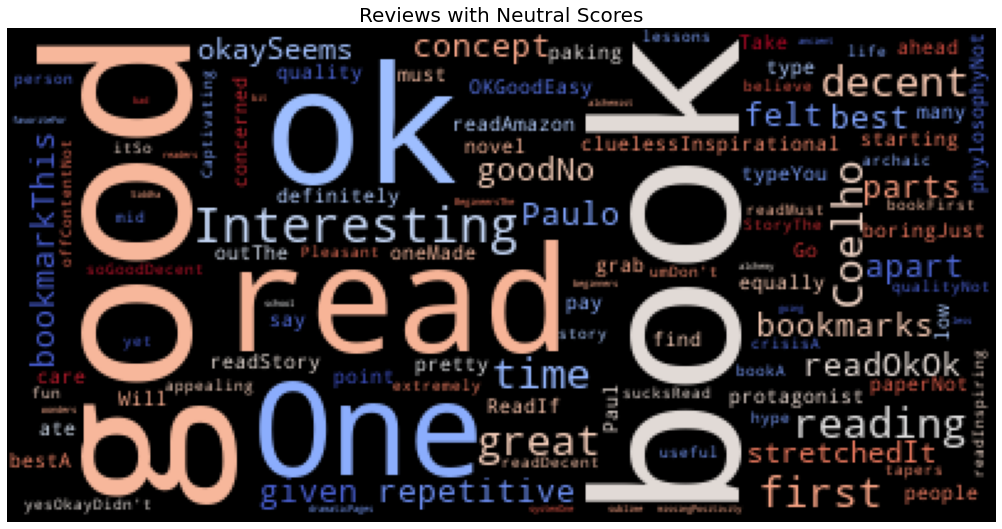

In [25]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_neutral,interpolation=None)
ax1.axis("off")
ax1.set_title('Reviews with Neutral Scores',fontsize=20)

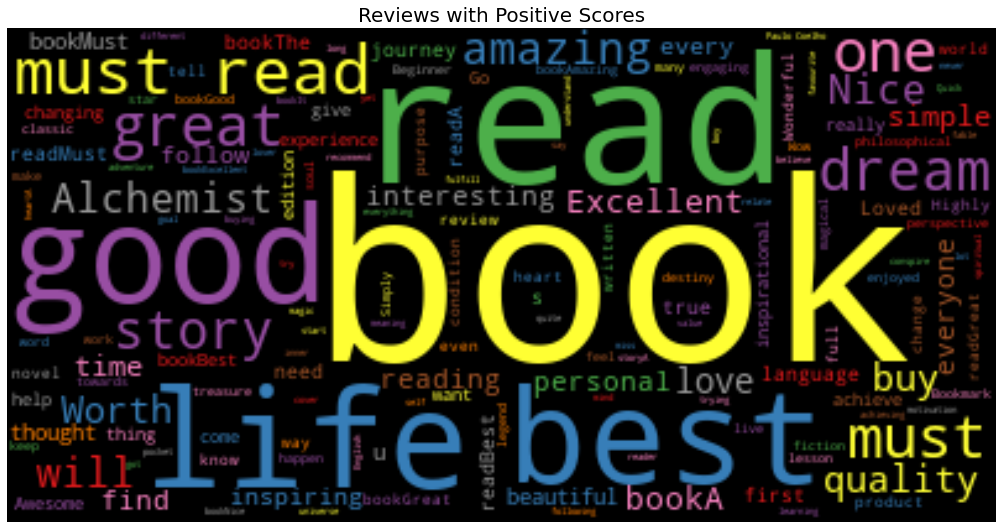

In [26]:
fig = plt.figure(figsize=(20,20))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

### Sentiment Score

### Install vaderSentiment

In [27]:
%pip install vaderSentiment

In [28]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [29]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['body']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.201,0.799,0.8979
1,0.000,0.496,0.504,0.7269
2,0.276,0.575,0.149,-0.3724
3,0.000,1.000,0.000,0.0000
4,0.000,0.702,0.298,0.1779


In [30]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)


,Count,title,rating,body,neg,neu,pos,compound
0,1,Amazing,5,truly recommend fantastic book get easy come,0.000,0.201,0.799,0.8979
1,2,Good,4,one best fiction booksit take world worth reading,0.000,0.496,0.504,0.7269
2,3,You will love it.,5,nothing say mind blowing book dont hesitate bu...,0.276,0.575,0.149,-0.3724


In [31]:
# if df_c['sentiment'] = np.where(df_c.compound >= 0.66 , 'Positive', df_c.compound)
# df_c

In [32]:
# Convert scores into positive and negetive sentiments using some threshold
def categorise(df_c):  
    if df_c['compound'] > -1 and df_c['compound'] <= -0.34:
        return 'Negative'
    elif df_c['compound'] > -0.34 and df_c['compound'] <= 0.32:
        return 'Neutral'
    elif df_c['compound'] > 0.32  and df_c['compound'] <= 1:
        return 'Positive'
    return 'Positive'

In [33]:
df_c['sentiment'] = df_c.apply(lambda df_c: categorise(df_c), axis=1)
df_c

,Count,title,rating,body,neg,neu,pos,compound,sentiment
0,1,Amazing,5,truly recommend fantastic book get easy come,0.000,0.201,0.799,0.8979,Positive
1,2,Good,4,one best fiction booksit take world worth reading,0.000,0.496,0.504,0.7269,Positive
2,3,You will love it.,5,nothing say mind blowing book dont hesitate bu...,0.276,0.575,0.149,-0.3724,Negative
3,4,No bookmark!,5,ordered 8 book altogether even single bookmark...,0.000,1.000,0.000,0.0000,Neutral
4,5,Great read!,5,must read amazon delivery quick,0.000,0.702,0.298,0.1779,Neutral
...,...,...,...,...,...,...,...,...,...
1215,1216,A seeker's friend,5,book set reader spiritual journey story one go...,0.000,0.909,0.091,0.3182,Neutral
1216,1217,"Language, Continuation ,Imaginable , Nice content",5,ive recieved rthe book today gone lil part enj...,0.000,0.811,0.189,0.7430,Positive
1217,1218,Copy of book is not ok. Page no missing.,2,book really awesome story follow narration sit...,0.086,0.676,0.238,0.6471,Positive
1218,1219,Focus on your GOAL .,5,delivery came good packaging delivery timepros...,0.049,0.448,0.502,0.9595,Positive


### Result

<AxesSubplot:>

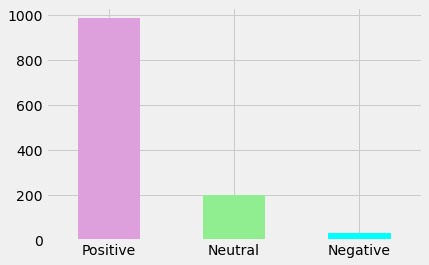

In [34]:
result=df_c['sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','lightgreen','cyan'])